<a href="https://colab.research.google.com/github/cs-pub-ro/ML/blob/master/homework/2020-2021/hw2/Tema_2_Skel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tema 2 - Taxi Driver

### Autori: 
* George Muraru


## 2. Scopul temei

Tema are ca scop folosirea unor tehnici simple de reinforcement learning pentru a realiza un bot care "știe" să realizeze o sarcină simplă: să transporte o persoană dintr-o locație în alta.

Mai multe detalii despre joc se pot găsi [aici](https://github.com/openai/gym/blob/master/gym/envs/toy_text/taxi.py) și [aici](https://gym.openai.com/envs/Taxi-v3/).

## 3. Workspace Setup

Pentru environmentul de joc, vom folosi "Gym" - un tool oferit de OpenAI pentru Reinforcement Learning.

Mai multe detalii puteți găsi [aici](https://gym.openai.com/).

### Dependețe

In [ ]:
!pip install -U gym

### Import biblioteci

In [ ]:
import gym
import seaborn as sns
import numpy as np

# Set seaborn plotting type
sns.set()

import matplotlib.pyplot as plt2
import random
import time
from IPython.display import clear_output

### Setup Environment pentru Taxi

In [ ]:
env = gym.make('Taxi-v3')

### Parametrii

In [ ]:
LOG_INTERVAL = 100 #@param {type: "slider", min: 0, max: 1000, step: 10}
NR_EPISODES = 10000 #@param {type: "slider", min: 5, max: 10000, step: 5}



### Hyperparametrii

In [ ]:
ALPHA = 0.1 #@param {type: "slider", min: 0.0, max: 1.0, step: 0.1}
GAMMA = 0.9 #@param {type: "slider", min: 0.0, max: 1.0, step: 0.1}
EPSILON = 0.9 #@param {type: "slider", min: 0.0, max: 1.0, step: 0.1}

# For BONUS

DECAY_EPS = 0.95 #@param {type: "slider", min: 0.0, max: 1.0, step: 0.05}
DECAY_EPS_EPISODES = 100 #@param {type: "slider", min: 0, max: 10000, step: 5}

### Rezultate obtinute prin modificare parametrilor

In [ ]:
eps_best_QL = {}
gamma_best_QL = {}
alpha_best_QL = {}

eps_avg_QL = {}
gamma_avg_QL = {}
alpha_avg_QL = {}

eps_best_SARSA = {}
gamma_best_SARSA = {}
alpha_best_SARSA = {}

eps_avg_SARSA = {}
gamma_avg_SARSA = {}
alpha_avg_SARSA = {}

## 4 Problemă de rezolvat

Dorim să implementăm un bot care utilizează Q-Learning sau Sarsa pentru a realiza un task simplu - transportarea unei persoane de la o poziție la alta.

De asemenea, dorim să observăm ce se întamplă când modifăm diferiți parametrii ai sistemului:
 - dăm un reward mai mic/mare pentru mișcări inutile
 - scoatem anumite informații din stare


### Choose action (5p)

Funcția `choose_action` are ca parametrii:
- `Q` - tabela de stări-acțiuni/tabelă de utilităti (aceasta se va modifica în pasul de antrenare),
- `state` - starea curentă în care se află jucătorul (în cazul nostru șoferul)
- `eps` - probabilitatea cu care se va alege o mutare random, are rolul de a controla tradeoff-ul dintre *Explorare* și *Exploatare* 

Funcția `choose_action` trebuie să intoarcă o acțiune random cu probabilitate `eps`, altfel acțiunea care maximizează utilitatea din starea curentă.

In [ ]:
def choose_action(Q: np.array, state: int, eps: float = 0.0) -> int:
    # TODO: Select an action
    action = 0
    chance = random.random()
    if chance < eps:
      action = env.action_space.sample()
    else:
      action = np.argmax(Q[state])

    return action

### 4.1 Q-Learning (25p)

Implementați algoritmul Q-Learning.

Formula de update pentru `Q` este:
$$
  Q[s_t, a] = Q[s_t, a] + \alpha(R + \gamma \max_{a}Q[s_{t+1}, a] - Q[s_t, a])
$$

Unde:
- `s_t` - starea la momentul `t`
- `a` - acțiunea aleasă la momentul `t`
- $\alpha$, $\gamma$ - parametru setat înainte de rulare
- `s_{t+1}` - starea la momentul `t+1`, după ce s-a efectua acțiunea `a`

#### Train

In [ ]:
REWARDS = []
eps = EPSILON

# Table used to keep the utilities for state-action
Q = np.zeros((env.observation_space.n, env.action_space.n))

env.seed(42)


for i in range(1, NR_EPISODES + 1):
    state = env.reset()
    has_ended = False
    total_reward = 0

    while not has_ended:
        # TODO: Get the action
        action = choose_action(Q, state, eps)
        # Do the action
        next_state, reward, has_ended, _ = env.step(action)

        # Cumulate the reward for plotting
        total_reward += reward

        # TODO: Update the Q(state, action) with the new value
        Q[state][action] += ALPHA * (reward + GAMMA * np.max(Q[next_state]) - Q[state][action])
        # TODO: Go to the new state
        state = next_state
    if i % LOG_INTERVAL == 0:
        REWARDS.append(total_reward)
        #print(f"Episode: {i}")

    # TODO (BONUS): Decay eps for every DECAY_EPS_EPISODES
    # Use DECAY_EPS

# Save the results for plotting
Q_1 = Q
print("Training Q-Learning finished.\n")

Training Q-Learning finished.



##### Cod auxiliar pentru a retine rezultatele la schimbarea parametrilor

In [ ]:
for GAMMA in range(11):
  GAMMA = GAMMA / 10.0
  eps = EPSILON
  REWARDS = []
# Table used to keep the utilities for state-action
  Q = np.zeros((env.observation_space.n, env.action_space.n))

  env.seed(42)
  for i in range(1, NR_EPISODES + 1):
    state = env.reset()
    has_ended = False
    total_reward = 0

    while not has_ended:
        # TODO: Get the action
        action = choose_action(Q, state, eps)
        # Do the action
        next_state, reward, has_ended, _ = env.step(action)

        # Cumulate the reward for plotting
        total_reward += reward

        # TODO: Update the Q(state, action) with the new value
        Q[state][action] += ALPHA * (reward + GAMMA * np.max(Q[next_state]) - Q[state][action])
        # TODO: Go to the new state
        state = next_state
    if i % LOG_INTERVAL == 0:
        REWARDS.append(total_reward)
        #print(f"Episode: {i}")
  gamma_best_QL[GAMMA] = max(REWARDS)
  gamma_avg_QL[GAMMA] = sum(REWARDS) / len(REWARDS)


#### Let's check the driver

In [ ]:
state = env.reset()
has_ended = False
while not has_ended:
    # TODO: Take always the best action
    action = np.argmax(Q_1[state])
    state, reward, has_ended, _ = env.step(action)
    time.sleep(0.75)
    env.render()
    print(f"Reward {reward}")
    clear_output(wait=True)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Reward 20


#### And the rewards

[Text(0, 0.5, 'reward'), Text(0.5, 0, '# episodes')]

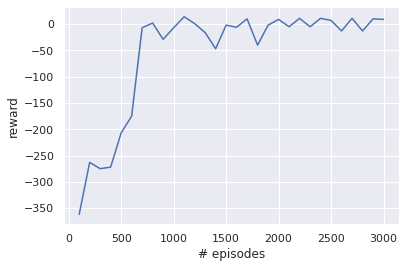

In [ ]:
x_points = np.arange(LOG_INTERVAL, NR_EPISODES + 1, LOG_INTERVAL)
y_points = REWARDS

plt = sns.lineplot(x=x_points, y=y_points)
plt.set(xlabel="# episodes", ylabel="reward")

### 4.2 SARSA (25p)

Implementați algoritmul SARSA.

Formula de update pentru `Q` este:
$$
  Q[s_t, a] = Q[s_t, a] + \alpha(R + \gamma Q[s_{t+1}, a'] - Q[s_t, a])
$$

Unde:
- $s_t$ - starea la momentul `t`
- **a** - acțiunea aleasă la momentul `t`
- **a'** - acțiunea aleasă la momentul `t+1`, presupunând ca suntem în starea $s_{t+1}$
- $\alpha$, $\gamma$ - parametru setat înainte de rulare
- $s_{t+1}$ - starea la momentul `t+1`, după ce s-a efectua acțiunea `a`

#### Train

In [ ]:
REWARDS = []
eps = EPSILON

Q = np.zeros((env.observation_space.n, env.action_space.n))

env.seed(42)


for i in range(1, NR_EPISODES + 1):
    state = env.reset()
    has_ended = False
    total_reward = 0

    # TODO: Get the action
    action = choose_action(Q, state, eps)

    while not has_ended:
        # Do the action
        next_state, reward, has_ended, _ = env.step(action)

        # TODO: Get the next_action from the next_state
        next_action = choose_action(Q, next_state, eps)

        # Cumulate the reward for plotting
        total_reward += reward

        # TODO: Update the Q(state, action) with the new value
        Q[state][action] += ALPHA * (reward + GAMMA * Q[next_state][next_action] - Q[state][action])

        # TODO: Go to the new state
        state = next_state

        # TODO: Update the action
        action = next_action


    if i % LOG_INTERVAL == 0:
        REWARDS.append(total_reward)
        print(f"Episode: {i}")

    # TODO (BONUS): Decay eps for every DECAY_EPS_EPISODES
    # Use DECAY_EPS


# Save for plotting

Q_2 = Q
print("Training SARSA finished.\n")

##### Cod auxiliar pentru a retine rezultatele la schimbarea parametrilor

In [ ]:
for GAMMA in range(11):
  GAMMA = GAMMA / 10.0
  ALPHA = 0.2
  REWARDS = []
  eps = 0.2

  Q = np.zeros((env.observation_space.n, env.action_space.n))
  env.seed(42)

  for i in range(1, NR_EPISODES + 1):
    state = env.reset()
    has_ended = False
    total_reward = 0
    action = choose_action(Q, state, eps)
    while not has_ended:
        next_state, reward, has_ended, _ = env.step(action)
        next_action = choose_action(Q, next_state, eps)
        total_reward += reward
        Q[state][action] += ALPHA * (reward + GAMMA * Q[next_state][next_action] - Q[state][action])
        state = next_state
        action = next_action
    if i % LOG_INTERVAL == 0:
        REWARDS.append(total_reward)
  gamma_best_SARSA[GAMMA] = max(REWARDS)
  gamma_avg_SARSA[GAMMA] = sum(REWARDS) / len(REWARDS)

In [ ]:
for i in gamma_best_SARSA:
  print(i, ", ", gamma_best_SARSA[i])

0.0 ,  -39
0.1 ,  12
0.2 ,  10
0.3 ,  11
0.4 ,  -11
0.5 ,  14
0.6 ,  9
0.7 ,  10
0.8 ,  9
0.9 ,  13
1.0 ,  13


#### Let's check the driver

In [ ]:
state = env.reset()
has_ended = False

while not has_ended:
    # TODO: Take always the best action
    action = np.argmax(Q_2[state])
    state, reward, has_ended, _ = env.step(action)
    time.sleep(0.75)
    env.render()
    print(f"Reward {reward}")
    clear_output(wait=True)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Reward 20


#### And the rewards

[Text(0, 0.5, 'reward'), Text(0.5, 0, '# episodes')]

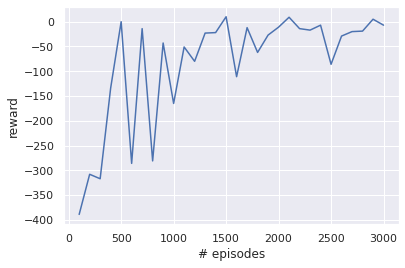

In [ ]:
x_points = np.arange(LOG_INTERVAL, NR_EPISODES + 1, LOG_INTERVAL)
y_points = REWARDS

plt = sns.lineplot(x=x_points, y=y_points)
plt.set(xlabel="# episodes", ylabel="reward")

### 4.3 Results (35p)



Modificați parametrii algoritmilor (cele de la începutul Notebook-ului), faceți grafice pentru fiecare caz și explicați rezultatele obținute.

Unii (și nu numai) dintre paramatrii pe care îi puteți modifica:
- numărul de episoade de antrenare
- `eps` mai mic/mare
- valoarea lui $\gamma$
- valoarea lui $\alpha$


#### Train episodes
- eps = 0.2
- $\gamma$ = 0.9
- $\alpha$ = 0.1

##### Explicatii rezultate
Pentru numarul de episoade de antrenare am pastrat parametrii initiali. Se observa ca scorul creste pana la un anumit punct, dupa care incepe sa oscileze in functie de noile drumuri pe care le exploreaza.

##### Q-Learning

Best score -  12
Best number of training episodes -  600


[Text(0, 0.5, 'reward'), Text(0.5, 0, '# episodes')]

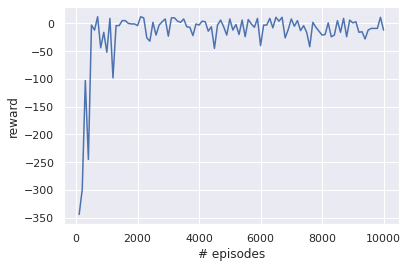

In [ ]:
x_points = np.arange(LOG_INTERVAL, NR_EPISODES + 1, LOG_INTERVAL)
y_points = REWARDS

print("Best score - ", max(REWARDS))
print("Best number of training episodes - ", LOG_INTERVAL * REWARDS.index(max(REWARDS)))

plt = sns.lineplot(x=x_points, y=y_points)
plt.set(xlabel="# episodes", ylabel="reward")

##### Sarsa

Best score -  13
Best number of training episodes -  6600


[Text(0, 0.5, 'reward'), Text(0.5, 0, '# episodes')]

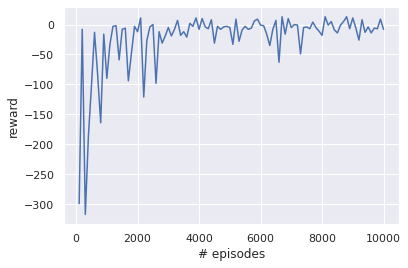

In [ ]:
x_points = np.arange(LOG_INTERVAL, NR_EPISODES + 1, LOG_INTERVAL)
y_points = REWARDS

print("Best score - ", max(REWARDS))
print("Best number of training episodes - ", LOG_INTERVAL * REWARDS.index(max(REWARDS)))

plt = sns.lineplot(x=x_points, y=y_points)
plt.set(xlabel="# episodes", ylabel="reward")

#### Eps

##### Explicatii rezultate
EPSILON reprezinta probabilitatea cu care vom alege o cale noua, alta decat cea pe care am determinat-o la episodul anterior ca fiind cea mai buna. Pentru a avea rezultate bune, acesta trebuie sa fie mic pentru a ne folosi de rezultatele pasilor anteriori, dar nu prea mic pentru a putea explora si alte posibile drumuri.  


Se observa ca, pentru ambii algoritmi, scorul mediu este invers proportional cu valoarea lui EPSILON. Dupa cum era de asteptat, un EPSILON mai mic va avea rezultate mai bune, valoarea de 0.1 fiind optima pentru Q-Learning, iar cele de 0 si 0.2 aducand cele mai bune rezultate algoritmului SARSA.




##### Q-Learning
- $\gamma$ = 0.9
- $\alpha$ = 0.1

dict_values([-5.02, -14.18, -30.18, -33.82, -56.86, -77.06, -125.56, -155.64, -336.88, -520.34, -771.66])


Text(0, 0.5, 'Reward')

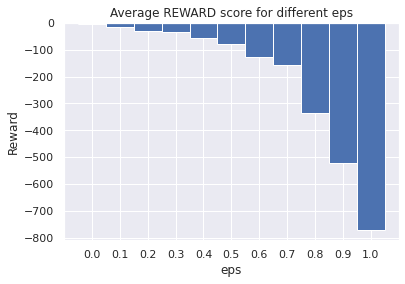

In [ ]:
keys = eps_avg_QL.keys()
values = eps_avg_QL.values()
print(values)
plt2.bar(keys, values, width=0.1)
plt2.xlim(-0.1, 1.1)
plt2.xticks(np.arange(0, 1.1, step=0.1))
plt2.title("Average REWARD score for different eps")
plt2.xlabel("eps")
plt2.ylabel("Reward")

dict_values([12, 15, 13, 12, 8, 12, -8, -14, -30, -96, -472])


Text(0, 0.5, 'Reward')

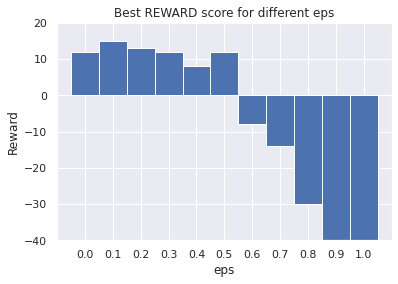

In [ ]:
keys = eps_best_QL.keys()
values = eps_best_QL.values()
print(values)
plt2.bar(keys, values, width=0.1)
plt2.xlim(-0.1, 1.1)
plt2.ylim(-40, 20)
plt2.xticks(np.arange(0, 1.1, step=0.1))
plt2.title("Best REWARD score for different eps")
plt2.xlabel("eps")
plt2.ylabel("Reward")

##### SARSA
- $\gamma$ = 0.9
- $\alpha$ = 0.1

dict_values([-9.22, -25.24, -29.58, -81.0, -122.18, -188.84, -214.62, -383.74, -525.92, -621.46, -783.52])


Text(0, 0.5, 'Reward')

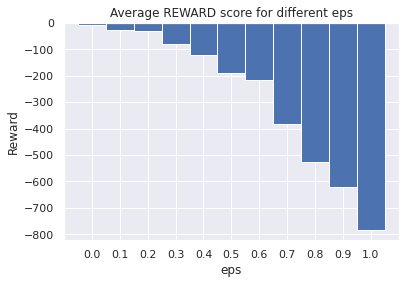

In [ ]:
keys = eps_avg_SARSA.keys()
values = eps_avg_SARSA.values()
print(values)
plt2.bar(keys, values, width=0.1)
plt2.xlim(-0.1, 1.1)
plt2.xticks(np.arange(0, 1.1, step=0.1))
plt2.title("Average REWARD score for different eps")
plt2.xlabel("eps")
plt2.ylabel("Reward")

dict_values([15, 14, 15, 11, 12, 13, -6, -13, -31, -94, -594])


Text(0, 0.5, 'Reward')

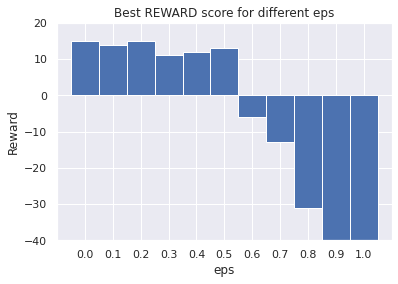

In [ ]:
keys = eps_best_SARSA.keys()
values = eps_best_SARSA.values()
print(values)
plt2.bar(keys, values, width=0.1)
plt2.xlim(-0.1, 1.1)
plt2.ylim(-40, 20)
plt2.xticks(np.arange(0, 1.1, step=0.1))
plt2.title("Best REWARD score for different eps")
plt2.xlabel("eps")
plt2.ylabel("Reward")

#### ALPHA

##### Explicatii rezultate
ALPHA reprezinta rata de invatare a algoritmului. Cu cat acesta este mai mare, cu atat algoritmul considera mai important ultimul episod fata de cele anterioare.

Pentru Q-Learning, desi cel mai bun scor se gaseste la valorile ALPHA=0.1 si ALPHA=0.8, se observa o diferenta considerabila intre cele doua valori pentru scorul mediu, in favoarea valorii ALPHA=0.8.

Pentru SARSA, valoarea optima pentru ALPHA este 0.2.

Principala diferenta dintre cei 2 algoritmi este faptul ca scorul mediu pentru Q-Learning creste odata cu cresterea valorii ALPHA, pe cand scorul mediu al SARSA scade. 

##### Q-Learning
- $\gamma$ = 0.9
- eps = 0.1

dict_values([-258.14, -20.62, -11.62, -6.04, -0.82, -4.76, -0.82, 0.42, 2.1, -0.52, 1.84])


Text(0, 0.5, 'Reward')

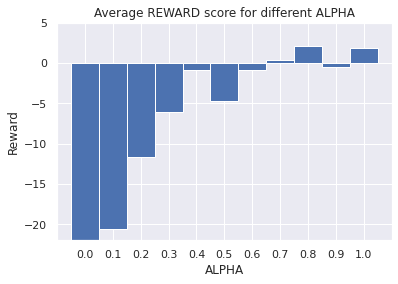

In [ ]:
keys = alpha_avg_QL.keys()
values = alpha_avg_QL.values()
print(values)
plt2.bar(keys, values, width=0.1)
plt2.xlim(-0.1, 1.1)
plt2.ylim(-22, 5)
plt2.xticks(np.arange(0, 1.1, step=0.1))
plt2.title("Average REWARD score for different ALPHA")
plt2.xlabel("ALPHA")
plt2.ylabel("Reward")

dict_values([-218, 15, 14, 14, 14, 11, 14, 14, 15, 13, 13])


Text(0, 0.5, 'Reward')

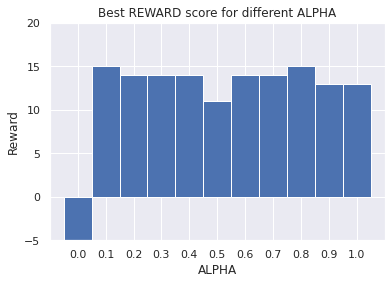

In [ ]:
keys = alpha_best_QL.keys()
values = alpha_best_QL.values()
print(values)
plt2.bar(keys, values, width=0.1)
plt2.xlim(-0.1, 1.1)
plt2.ylim(-5, 20)
plt2.xticks(np.arange(0, 1.1, step=0.1))
plt2.title("Best REWARD score for different ALPHA")
plt2.xlabel("ALPHA")
plt2.ylabel("Reward")

##### SARSA
- $\gamma$ = 0.9
- eps = 0.2

dict_values([-317.9, -45.92, -38.3, -21.52, -41.48, -70.14, -53.64, -72.1, -149.88, -213.46, -267.76])


Text(0, 0.5, 'Reward')

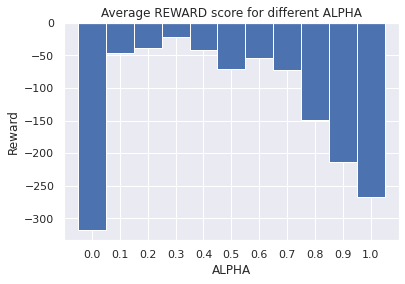

In [ ]:
keys = alpha_avg_SARSA.keys()
values = alpha_avg_SARSA.values()
print(values)
plt2.bar(keys, values, width=0.1)
plt2.xlim(-0.1, 1.1)
plt2.xticks(np.arange(0, 1.1, step=0.1))
plt2.title("Average REWARD score for different ALPHA")
plt2.xlabel("ALPHA")
plt2.ylabel("Reward")

dict_values([-236, 12, 15, 10, 11, 5, 12, 13, 12, 9, 3])


Text(0, 0.5, 'Reward')

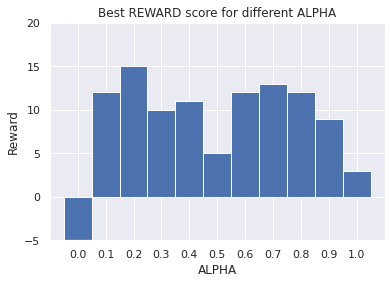

In [ ]:
keys = alpha_best_SARSA.keys()
values = alpha_best_SARSA.values()
print(values)
plt2.bar(keys, values, width=0.1)
plt2.xlim(-0.1, 1.1)
plt2.ylim(-5, 20)
plt2.xticks(np.arange(0, 1.1, step=0.1))
plt2.title("Best REWARD score for different ALPHA")
plt2.xlabel("ALPHA")
plt2.ylabel("Reward")

#### GAMMA

##### Explicatii rezultate
GAMMA reprezinta factorul de atenuare. Acesta determina daca algoritmul prefera reward-uri imediate sau cauta reward-uri mai bune pe distante mai mari.

Pentru Q-Learning, valoarea de 0.2 aduce cele mai bune scoruri pe parcursul invatarii, dar valorile [0.7, 0.8, 0.9] reusesc sa ajunga la un scor maxim mai bun.

Pentru SARSA, se observa faptul ca rezultatele sunt direct proportionale cu valoarea GAMMA, cu exceptia anomaliei petrecute la valoarea 0.4.



##### Q-Learning
- $\alpha$ = 0.1
- eps = 0.1

dict_values([-257.06, 1.6, 3.98, 1.58, -0.04, 0.82, 0.88, 0.24, -0.12, 1.2, -1.7])


Text(0, 0.5, 'Reward')

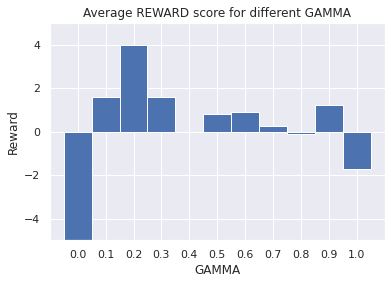

In [ ]:
keys = gamma_avg_QL.keys()
values = gamma_avg_QL.values()
print(values)
plt2.bar(keys, values, width=0.1)
plt2.xlim(-0.1, 1.1)
plt2.ylim(-5, 5)
plt2.xticks(np.arange(0, 1.1, step=0.1))
plt2.title("Average REWARD score for different GAMMA")
plt2.xlabel("GAMMA")
plt2.ylabel("Reward")

dict_values([-218, 13, 14, 14, 15, 14, 13, 15, 15, 15, 13])


Text(0, 0.5, 'Reward')

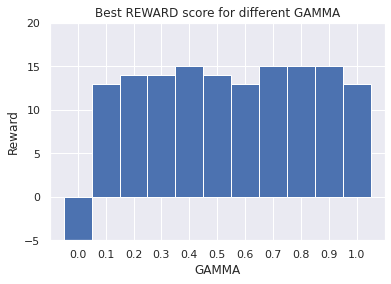

In [ ]:
keys = gamma_best_QL.keys()
values = gamma_best_QL.values()
print(values)
plt2.bar(keys, values, width=0.1)
plt2.xlim(-0.1, 1.1)
plt2.ylim(-5, 20)
plt2.xticks(np.arange(0, 1.1, step=0.1))
plt2.title("Best REWARD score for different GAMMA")
plt2.xlabel("GAMMA")
plt2.ylabel("Reward")

##### SARSA
- $\alpha$ = 0.2
- eps = 0.2

dict_values([-308.38, -237.72, -258.96, -234.1, -229.24, -217.88, -197.06, -116.88, -59.84, -37.26, -23.7])


Text(0, 0.5, 'Reward')

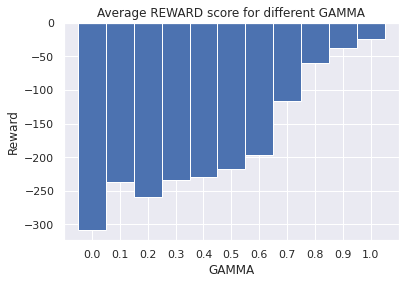

In [ ]:
keys = gamma_avg_SARSA.keys()
values = gamma_avg_SARSA.values()
print(values)
plt2.bar(keys, values, width=0.1)
plt2.xlim(-0.1, 1.1)
plt2.xticks(np.arange(0, 1.1, step=0.1))
plt2.title("Average REWARD score for different GAMMA")
plt2.xlabel("GAMMA")
plt2.ylabel("Reward")

dict_values([-39, 12, 10, 11, -11, 14, 9, 10, 9, 13, 13])


Text(0, 0.5, 'Reward')

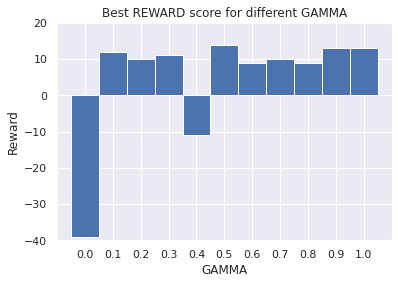

In [ ]:
keys = gamma_best_SARSA.keys()
values = gamma_best_SARSA.values()
print(values)
plt2.bar(keys, values, width=0.1)
plt2.xlim(-0.1, 1.1)
plt2.ylim(-40, 20)
plt2.xticks(np.arange(0, 1.1, step=0.1))
plt2.title("Best REWARD score for different GAMMA")
plt2.xlabel("GAMMA")
plt2.ylabel("Reward")

#### 4.4 And something more... (10p)

##### A simple move (5p)


Dorim să vedem importanța reward-ului și a stării.

Modificați celula de antrenare pentru una dintre metode astfel încât reward-ul pentru o **mutare simplă** să fie 0, (acum este -1). Refaceți graficul metodei alese și trageți concluziile.


Se observa faptul ca rezultatele pentru o harta fara penalizari pentru o mutare simpla sunt mult mai slabe si variaza mult mai mult. De asemenea, nu se poate determina daca modelul invata, avand in vedere ca graficul nu pare sa fie in ascensiune odata cu cresterea numarului de episoade.

In [ ]:
REWARDS = []
eps = EPSILON

# Table used to keep the utilities for state-action
Q = np.zeros((env.observation_space.n, env.action_space.n))

env.seed(42)


for i in range(1, NR_EPISODES + 1):
    state = env.reset()
    has_ended = False
    total_reward = 0

    while not has_ended:
        # TODO: Get the action
        action = choose_action(Q, state, eps)
        # Do the action
        next_state, reward, has_ended, _ = env.step(action)
        if reward == -1:
          reward = reward + 1
        # Cumulate the reward for plotting
        total_reward += reward

        # TODO: Update the Q(state, action) with the new value
        Q[state][action] += ALPHA * (reward + GAMMA * np.max(Q[next_state]) - Q[state][action])
        # TODO: Go to the new state
        state = next_state
    if i % LOG_INTERVAL == 0:
        REWARDS.append(total_reward)

# Save the results for plotting
Q_3 = Q
print("Training Q-Learning finished.\n")

Training Q-Learning finished.



[Text(0, 0.5, 'reward'), Text(0.5, 0, '# episodes')]

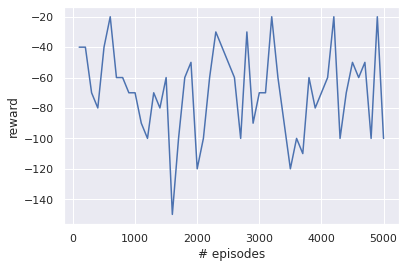

In [ ]:
x_points = np.arange(LOG_INTERVAL, NR_EPISODES + 1, LOG_INTERVAL)
y_points = REWARDS

plt = sns.lineplot(x=x_points, y=y_points)
plt.set(xlabel="# episodes", ylabel="reward")

##### A little less space (5p)

**Starea** are valori discrete (500 de valori posibile), iar aceasta este encodată folosind metoda d [aici](https://github.com/openai/gym/blob/master/gym/envs/toy_text/taxi.py#L128).

Rescrieți codul astfel încât starea să fie encodată folosind:
$$
(((taxi\_row * 5) + taxi\_column) * 5 + pass\_loc) * 2 + destination
$$
Antrenați unul dintre algoritmi, faceți graficul și explicați rezultatul.

**Atenție!** Trebuie să și modificați cum arată Q (forma matricei).

Hint: Decodarea stării este [aici](https://github.com/openai/gym/blob/master/gym/envs/toy_text/taxi.py#L139)


In [ ]:
def new_encode(taxi_row, taxi_col, pass_loc, dest_idx):
  i = taxi_row
  i *= 5
  i += taxi_col
  i *= 5
  i += pass_loc
  i *= 2
  i += dest_idx
  return i

def new_decode(i):
  out = []
  out.append(i % 2)
  i = i // 2
  out.append(i % 5)
  i = i // 5
  out.append(i % 5)
  i = i // 5
  out.append(i)
  assert 0 <= i < 5
  return reversed(out)

def convert_state(i):
  dec_state = env.decode(i)
  dec_i = []
  for elem in dec_state:
    dec_i.append(elem)
  return new_encode(dec_i[0], dec_i[1], dec_i[2], dec_i[3])

202


In [ ]:
def get_legal_actions(state):
  """
   Actions:
    There are 6 discrete deterministic actions:
    - 0: move south
    - 1: move north
    - 2: move east
    - 3: move west
    - 4: pickup passenger
    - 5: drop off passenger
  """
  legal_actions = [4, 5] # legal but they could get penalized
  dec_state_aux = new_decode(state)
  decoded_state = []
  for elem in dec_state_aux:
    decoded_state.append(elem)
  posx = decoded_state[0]
  posy = decoded_state[1]
  # south
  if posy + 1 < 5:
    legal_actions.append(0)
  # north
  if posy - 1 >= 0:
    legal_actions.append(1)
  # east
  if posx + 1 < 5:
    legal_actions.append(2)
  # west
  if posx - 1 >= 0:
    legal_actions.append(3)
  return legal_actions

def choose_action_new(Q: np.array, state: int, eps: float = 0.0) -> int:
    # TODO: Select an action
    action = 0
    chance = random.random()
    if chance < eps:
      action = random.choice(get_legal_actions(state))
    else:
      action = np.argmax(Q[state])

    return action

In [ ]:
REWARDS = []
eps = EPSILON
num_states = int((env.observation_space.n + 4) / 2) # converting from old formula to the new one

# Table used to keep the utilities for state-action
Q = np.zeros((num_states, env.action_space.n))

env.seed(42)


for i in range(1, NR_EPISODES + 1):
    state = env.reset()
    state = convert_state(state)
    has_ended = False
    total_reward = 0

    while not has_ended:
        # TODO: Get the action
        action = choose_action_new(Q, state, eps)
        # Do the action
        next_state, reward, has_ended, _ = env.step(action)
        next_state = convert_state(next_state)
        # Cumulate the reward for plotting
        total_reward += reward

        # Update the Q(state, action) with the new value
        Q[state][action] += ALPHA * (reward + GAMMA * np.max(Q[next_state]) - Q[state][action])
        # Go to the new state
        state = next_state
    if i % LOG_INTERVAL == 0:
        REWARDS.append(total_reward)


# Save the results for plotting
Q_4 = Q
print("Training Q-Learning finished.\n")

AssertionError: ignored

## 5 BONUS: Some decay on the way (10p)

Analizați ce se întâmplă daca scadeți treptat `eps`, pe măsura antrenării. 

Intuitiv, dorim ca la începutul antrenării agentul să **exploreze** cât mai mult posibil și să atingă un număr mare de stări (în exemplul nostru cu taxiul, nu avem așa multe stări, dar sunt jocuri în care spațiul stărilor poate fi mai mare).

De asemenea, pe măsură ce continuăm antrenarea, dorim ca taximetristul să înceapă să **exploateze** mai mult stările cunoscute cu o utilitate mare.



### Concluzie

Se observa ca scaderea treptata a lui eps aduce mai multa consistenta odata cu cresterea numarului de episoade.

### Q-Learning

In [ ]:
REWARDS = []
eps = EPSILON

# Table used to keep the utilities for state-action
Q = np.zeros((env.observation_space.n, env.action_space.n))

env.seed(42)


for i in range(1, NR_EPISODES + 1):
    state = env.reset()
    has_ended = False
    total_reward = 0

    while not has_ended:
        # TODO: Get the action
        action = choose_action(Q, state, eps)
        # Do the action
        next_state, reward, has_ended, _ = env.step(action)

        # Cumulate the reward for plotting
        total_reward += reward

        # TODO: Update the Q(state, action) with the new value
        Q[state][action] += ALPHA * (reward + GAMMA * np.max(Q[next_state]) - Q[state][action])
        # TODO: Go to the new state
        state = next_state
    if i % LOG_INTERVAL == 0:
        REWARDS.append(total_reward)
        #print(f"Episode: {i}")

    # TODO (BONUS): Decay eps for every DECAY_EPS_EPISODES
    # Use DECAY_EPS
    if i % DECAY_EPS_EPISODES == 0:
      eps *= DECAY_EPS

# Save the results for plotting
Q_5 = Q
print("Training Q-Learning finished.\n")

Training Q-Learning finished.



13


[Text(0, 0.5, 'reward'), Text(0.5, 0, '# episodes')]

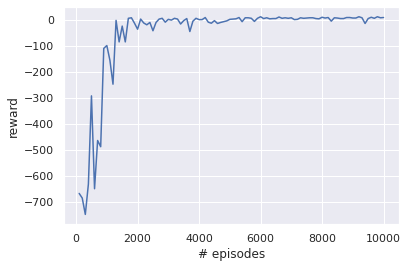

In [ ]:
x_points = np.arange(LOG_INTERVAL, NR_EPISODES + 1, LOG_INTERVAL)
y_points = REWARDS
print(max(REWARDS))

plt = sns.lineplot(x=x_points, y=y_points)
plt.set(xlabel="# episodes", ylabel="reward")

###SARSA


In [ ]:
REWARDS = []
eps = EPSILON

Q = np.zeros((env.observation_space.n, env.action_space.n))

env.seed(42)


for i in range(1, NR_EPISODES + 1):
    state = env.reset()
    has_ended = False
    total_reward = 0

    # TODO: Get the action
    action = choose_action(Q, state, eps)

    while not has_ended:
        # Do the action
        next_state, reward, has_ended, _ = env.step(action)

        # TODO: Get the next_action from the next_state
        next_action = choose_action(Q, next_state, eps)

        # Cumulate the reward for plotting
        total_reward += reward

        # TODO: Update the Q(state, action) with the new value
        Q[state][action] += ALPHA * (reward + GAMMA * Q[next_state][next_action] - Q[state][action])

        # TODO: Go to the new state
        state = next_state

        # TODO: Update the action
        action = next_action


    if i % LOG_INTERVAL == 0:
        REWARDS.append(total_reward)

    # TODO (BONUS): Decay eps for every DECAY_EPS_EPISODES
    # Use DECAY_EPS
    if i % DECAY_EPS_EPISODES:
      eps *= DECAY_EPS


# Save for plotting

Q_6 = Q
print("Training SARSA finished.\n")

Training SARSA finished.



14


[Text(0, 0.5, 'reward'), Text(0.5, 0, '# episodes')]

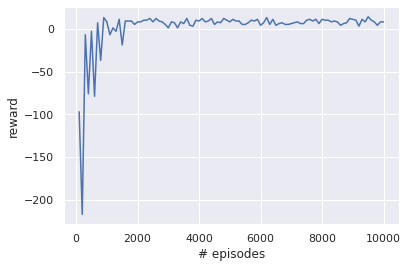

In [ ]:
x_points = np.arange(LOG_INTERVAL, NR_EPISODES + 1, LOG_INTERVAL)
y_points = REWARDS
print(max(REWARDS))

plt = sns.lineplot(x=x_points, y=y_points)
plt.set(xlabel="# episodes", ylabel="reward")